# 110. Balanced Binary Tree

### Difficulty: <font color = green> Easy </font>

---

Given a binary tree, determine if it is 
height-balanced.

---

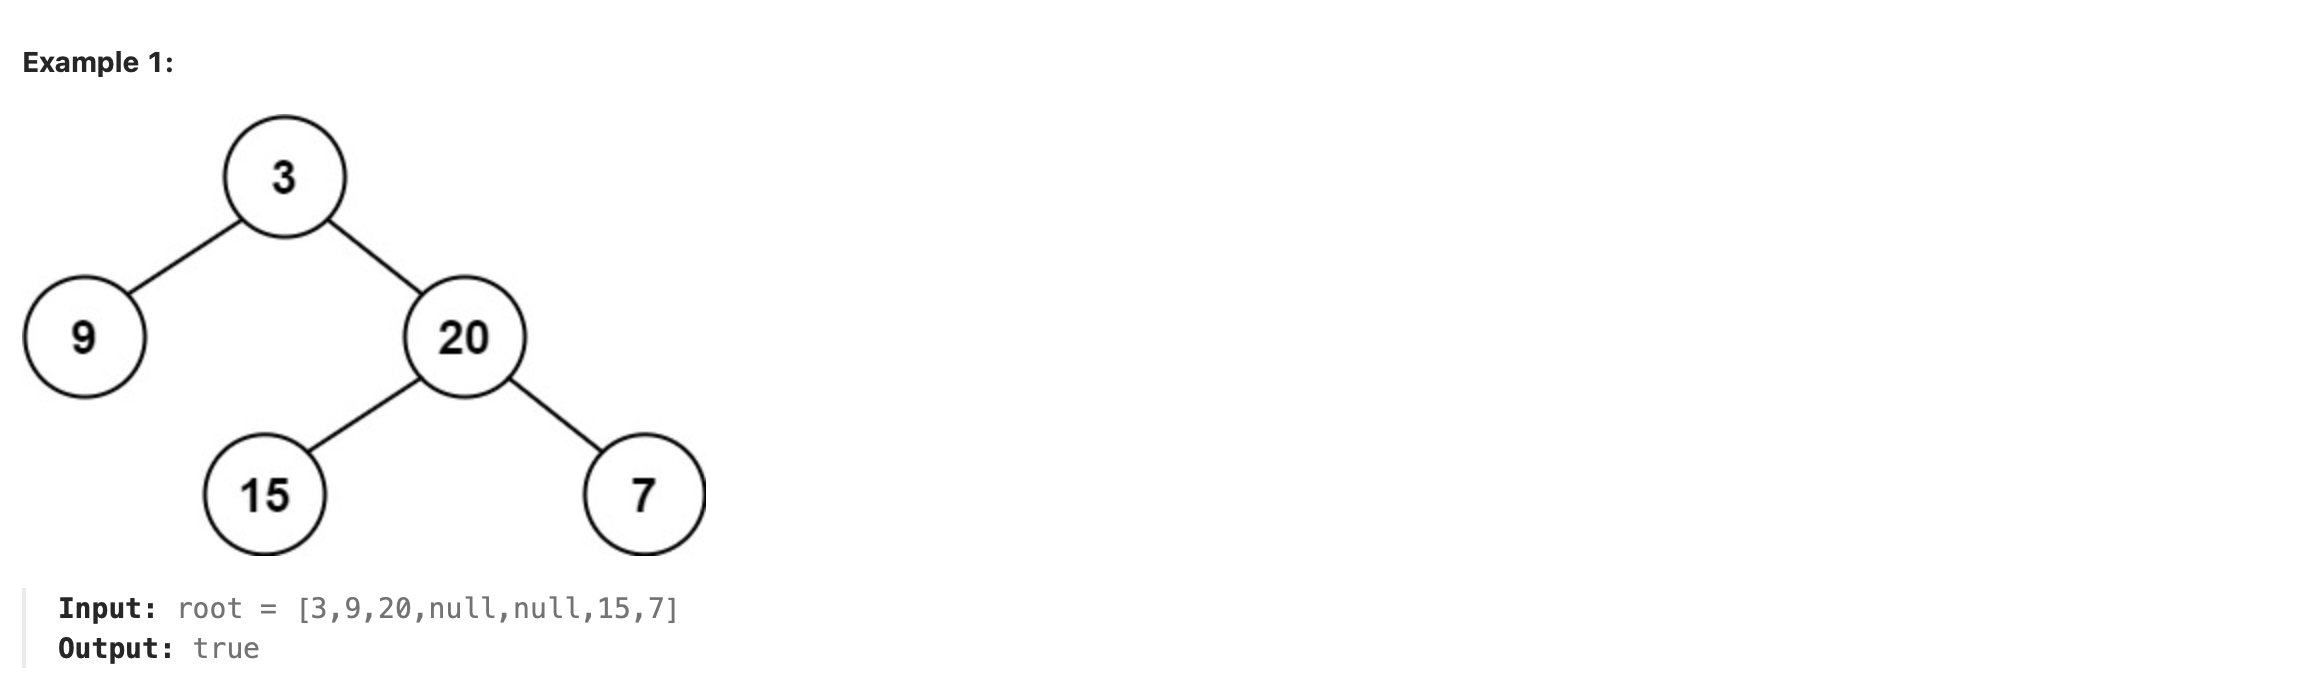

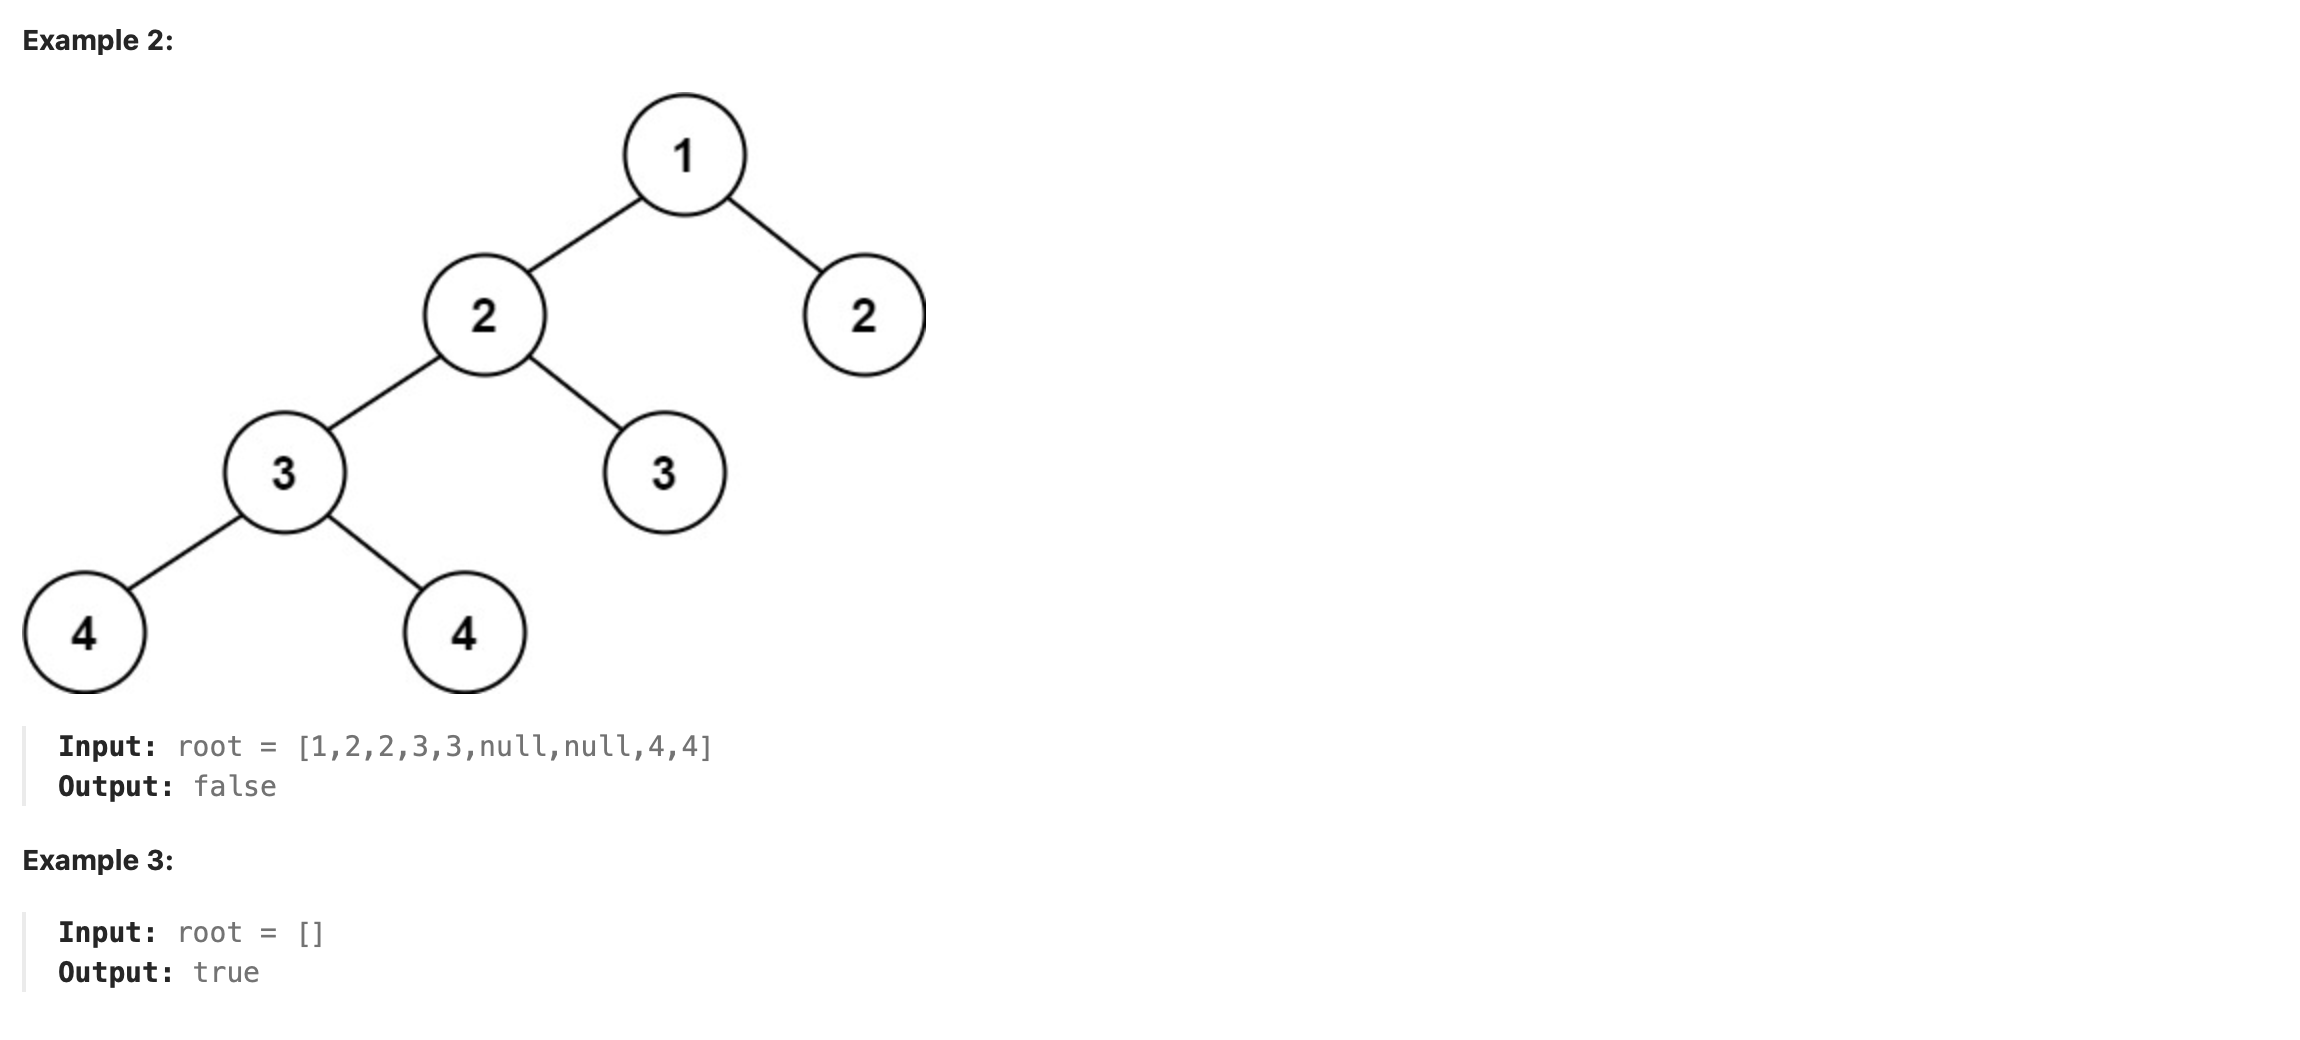

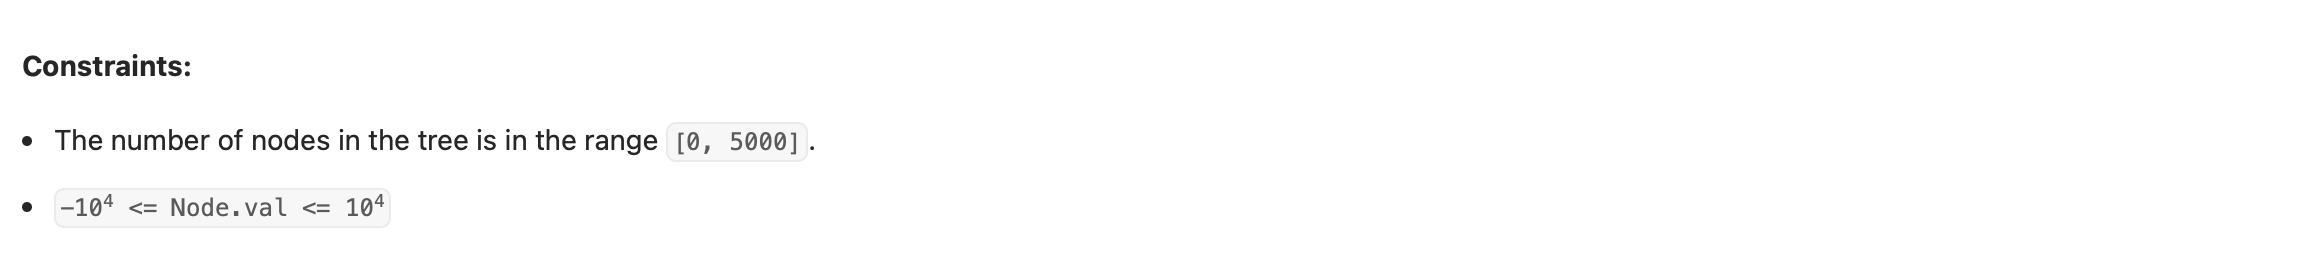

## Approach Overview

Traverse through the binary tree using Depth First Search. Each node we visit, we calculate the height of its left and right subtree and check if it difers by more than 1. 

If the heights difers by more than 1, then this means the subtree is unbalanced and we communicate this info to the rest of the call stack when backtracking. 

Else we continue the height calculation operations and keep backtracking until we reach root node. If we don't find any unbalances (which means the tree is balanced). 



## Detailed Explanation

Using recursive depth first search we traverse through every node in the tree. Each node we we visit, we calculate the height of its left & right subtree and check if their difference exceeds 1. 

If it exceeds 1 then this means the subtree is unbalanced, and to propagate this info up the callstack (to alert we found an unbalanced), we return a special value. The special value of choice is -1 ("-1" means we found an inbalance in the tree / it means the tree is unbalanced).

So when the next parent node is called they will also return -1 and the next one will also return -1 and the next and so on until we reach the root node, which will also return -1.

We continuously return -1 once we find an unbalance because we don't need to keep performing the height calculation operations. In the event we find just ONE unbalanced subtree, we'll know for sure the entire tree is unbalanced and that we only need to return -1.                                                                                     



## Key Challenges

1. I was correctly calculating the height of the subtrees. My logic for identifying unbalanced subtrees was also correct, but I made a blunder. Whenever I found an unbalance, I was improperly returning this key piece of information to the rest of the call stack (parent and grandfather and great grandfather nodes located above the current child node). 

How?

Well by my logic whenever 
`if abs(left_height - right_height) > 1: return -1  # Tree is imbalanced`.

The height returned would be `return False`. 

`False` is the result the parent node located above the current child node (subtree) would receive. 

It will receive the info at this line of code: `height(left or right subtree) = False`

But this `False` is not a suitable special value to use to communicate an unbalance to the rest of the call stack. 

Because when this line will get called again: `if abs(left_height - right_height) > 1: return -1  # Tree is imbalanced`.

It will return an incorrect info. This is the point at which the logic will break down. 

Let me explain using an example.

Say `left_height = False` (left subtree is unbalanced) and `right_height = 1` (right subtree is not unbalanced).

`abs(left_height - right_height)` will compute to `abs(0 - 1) = 1`. (`False = 0` and `True = 1` when used in arithmetic computations in Python)

And the final value returned will be 

`return 1 + max(False, 1)` 

`= 1 + max(0, 1)` 

`= 1 + 1 = 2`

so `height(node) = 2`

But this is **flawed**. 

We've already found that there was an unbalance in the left subtree below. So the function should just propagate this info & return it. That's all it needs to do. It doesn't need to repeat height calculation operations again and return the value of height differences. 

And this was my mistake. 

I correctly calculated the subtree heights and correctly spotted unbalances, but I didn't properly catch that info and communicate it to the rest of the call stack.

## Solution:

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def isBalanced(self, root: Optional[TreeNode]) -> bool:
            
        def height(root):
            # base case
            # check if current node is empty
            if not root:
                # if yes, return 0
                return 0
            
            # calculate height of left subtree
            left_height = height(root.left)
            
            # check if the height of left subtree is -1 (we're checking if subtree is unbalanced)
            if left_height == -1:
                    
                return -1  # if yes then propagate the imbalance

            # calculate height of left subtree
            right_height = height(root.right)
            
            # check if the height of right subtree is -1 (we're checking if subtree is unbalanced)
            if right_height == -1:
                return -1  # If yes then Propagate the imbalance
            
            # compute the difference in heights between the left and right subtrees
            # and then check if its more than 1
            if abs(left_height - right_height) > 1:
                return -1  # Tree is imbalanced
            
            # return height of current node
            return 1 + max(left_height, right_height)
        
        # check if Tree is unbalanced
        if height(root) == -1:

            # return False
            return False

        # if Tree is not unbalanced then it must be balanced
        else:
            # return True
            return True

## Alternative Solution

This was neetcode's solution to the problem.


### Approach Overview

His approached involved recursively traversing through the binary tree using depth first search.

At each node visitation, two key things are calculated and returned: 

**(1)** A boolean value indicating whether an imbalance was detected in one of the subtrees (`True = no imbalance` & `False = imbalance`)

**(2)** The height of the current node / subtree

These info are stored in a list. 

In the end (once the traversal is done), we output the Boolean value (either `True` or `False` / whether there an imbalance was found or not).

### Detailed Explanation

This method was very interesting. It definitely was a lot of more algorithmically concise than mine. 

So the idea is pretty simple, recursively traverse through the tree using depth first search. Each node / subtree we visit, we compute it's height and whether it has an imbalance. 

IMPORTANT NOTE: A leaf node doesn't have any imbalance, so each time we reach one, we do two things. 

1. Set imbalance (boolean) variable to `True` (indicating there's no imbalance) 

2. Set its height to `1`

To catch and propagate the existence of an imbalance. An clever technique was employed.

He introduced a (boolean) variable named `balanced`.

To detect an imbalance. Three checks are done. 

1. Check if there was an imbalance present in any left subtrees in previous levels 

2. Check if there was an imbalance present in any right subtrees in previous levels 

3. Check if the (children) subtrees of the current parent node is imbalanced

All three conditions must be true for the current subtree to be considered balanced.

The implementation:

`balanced = left_height and right_height and abs(left_height - right_height) <= 1`

Let's examine it closer.

- If there was an imbalance present in any of the left subtrees in previous levels, `left_height` will return `False`

- If there was an imbalance present in any of the right subtrees in previous levels, `right_height` will return `False`

- If there is an imbalance present between the subtrees of the current parent node, `abs(left_height - right_height) <= 1` will return `False`


If any of these conditions evaluate to `False`, we will know an imbalance is present somewhere and we will both store and return this key piece of info at the end.

`return dfs(root)[0]`

### Solution:

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def isBalanced(self, root: Optional[TreeNode]) -> bool:
        
        def dfs(root):
            
            # base case
            # check if current node is empty
            if not root:
                
                # if yes return [True, 0] 
                # True means there's no imbalance and 0 represents height of the node / subtree
                return [True, 0]
            
            # calculate the height of left subtree / node
            left_height = dfs(root.left)
            
            # calculate the height of right subtree / node
            right_height = dfs(root.right)
            
            # evaluate whether there's an imbalance in either the left or right subtrees 
            balanced = left_height[0] and right_height[0] and abs(left_height[1] - right_height[1]) <= 1
            
            # store whether an imbalance was found and store the height of the current node / subtree in a list
            return [balanced, 1 + max(left_height[1], right_height[1])]
        
        # return whether an imbalance was found 
        return dfs(root)[0]